<img src = "./bgsedsc_0.jpg">
$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bxi}{\boldsymbol \xi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\bw}{\boldsymbol{w}}$
$\newcommand{\balpha}{\boldsymbol{\alpha}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

# Project: Decision Trees


## Programming project: real estate assesment evaluation

Home valuation is key in real estate industry, and also the basis for mortgages in credit sector. Here we have to predict the estimated value of a property.


Data (*Regression_Supervised_Train_reduced.csv*) consist of a list of features plus the resulting $parcelvalue$, described in *Case_data_dictionary.xlsx* file. Each row corresponds to a particular home valuation, and $transactiondate$ is the date when the property was effectively sold. Properties are defined by $lotid$, but be aware that one property can be sold more than once (it's not the usual case). Also notice that some features are sometime empty, your model has to deal with it.

Note that you don't have to use $totaltaxvalue$, $buildvalue$ or $landvalue$, because they are closely correlated with the final value to predict.

+ Using this data build a predictive model for $parcelvalue$. Should be one belonging to the decision trees family of models (random forest, adaboost, gbm, xgboost, etc.).
+ Try a first quick implementation, then try to optimize hyperparameters
+ If you have computational problems, try in-class a first version with half of the observations. Remember to paralellize when possible (*n_jobs* parameter).
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the MSE estimate on the test data once released.
+ Bonus: Try an approach to fill NA without removing features or observations, and check improvements.
+ Extra bonus: Try to do a final model that as an ensemble of different decision trees models (e.g. random forest, xgboost, GBM ...), and even including models from another families (SVM, kNN).


You can follow those **steps** in your first implementation:
1. *Explore* and understand the dataset. Report missing data
2. As a simplified initial version, get rid of *missing data* by:
    + Removing features that have more than 40% of missing data
    + After that, removing observations that have missing data
3. Create *dummy variables* for relevant categorical features
4. *Build* your model and test it on the same input data.
5. Assess expected accuracy using *cross-validation*
6. Try to assess variable *importance*
7. Prepare the code to *run* on a new input file and be able to report accuracy, following same preparation steps (missing data, dummies, etc)

You may want to iterate to refine some of these steps once you get performance results in step 5.

**Warning**: Please, to proceed to step 7, first *dump* your model to a file, and load it again from there. Then, remember to share with me not only the notebook, but also the dump file. Here you have an example using package *pickle*.

```python
    # generate model
    my_model= SVC(C=100, probability=True, gamma='scale')
    my_model.fit(xtrain,ytrain)
    
    # save model
    filename = 'stacking_model.sav'
    pickle.dump(my_model, open(filename, 'wb'))

    # load the model from disk and use it
    loaded_model = pickle.load(open(filename, 'rb'))
    loaded_model.predict_proba(xtest)

```

## Step 1: Read and explore data, report missing data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pylab as plt
from utils.helper_functions import *

In [2]:
#import the data
data = pd.read_csv('Data/Regression_Supervised_Train_reduced.csv')

In [3]:
#Understand the size of the data set
data.shape

(24755, 48)

In [4]:
#Initial overview of the data
data.describe()

,lotid,logerror,aircond,style,basement,numbath,numbedroom,classbuild,qualitybuild,decktype,...,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,taxdelinquencyyear,mypointer
count,2.475500e+04,1763.000000,14464.000000,233.000000,56.000000,24755.000000,24755.000000,18.000000,14654.000000,712.0,...,14761.000000,24743.000000,9634.000000,2.475200e+04,2.475500e+04,24755.000000,2.475500e+04,24754.000000,886.000000,24755.000000
mean,1.335009e+07,0.012562,2.107232,7.141631,636.839286,2.603514,3.297637,3.833333,5.640235,66.0,...,1.006300,1972.886473,1.540378,2.382736e+05,5.430185e+05,2015.281761,3.047738e+05,6665.055184,13.969526,17672.183559
std,3.444823e+06,0.129091,3.384228,2.051415,488.847319,1.045068,1.072567,0.383482,2.251645,0.0,...,0.123305,18.745019,0.531651,2.928330e+05,7.259855e+05,0.449867,4.930763e+05,8999.000816,1.523517,10215.193608
min,1.071173e+07,-0.605100,1.000000,2.000000,68.000000,0.000000,0.000000,3.000000,1.000000,66.0,...,1.000000,1880.000000,1.000000,1.010000e+02,1.562300e+04,2015.000000,1.300000e+02,49.080000,6.000000,1.000000
25%,1.108076e+07,-0.026479,1.000000,7.000000,255.000000,2.000000,3.000000,4.000000,4.000000,66.0,...,1.000000,1961.000000,1.000000,1.141252e+05,2.396560e+05,2015.000000,9.468850e+04,3042.225000,14.000000,8850.500000
50%,1.212766e+07,0.005000,1.000000,7.000000,556.000000,2.500000,3.000000,4.000000,6.000000,66.0,...,1.000000,1974.000000,2.000000,1.725460e+05,3.842500e+05,2015.000000,1.936930e+05,4744.815000,14.500000,17660.000000
75%,1.467828e+07,0.036462,1.000000,7.000000,929.250000,3.000000,4.000000,4.000000,7.000000,66.0,...,1.000000,1986.000000,2.000000,2.631998e+05,6.090000e+05,2016.000000,3.548305e+05,7387.355000,15.000000,26537.500000
max,1.629608e+08,2.489000,13.000000,21.000000,2485.000000,19.000000,11.000000,4.000000,12.000000,66.0,...,9.000000,2016.000000,3.000000,1.023363e+07,2.563981e+07,2016.000000,2.430208e+07,311386.080000,15.000000,35363.000000


### 1.1. Initial exploration of the variable of interest (*parcel value*)

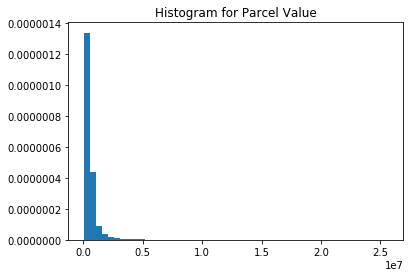

In [5]:
plt.hist(data.parcelvalue, density = True, bins = 50)
plt.title('Histogram for Parcel Value')
plt.show()

From this initial histogram we can see that we are dealing with highly skewed data. Prediction is going to do be difficult if we do not thing of a sound strategy to deal with this. A first approach could be to transform the variable with the $\log$ function.

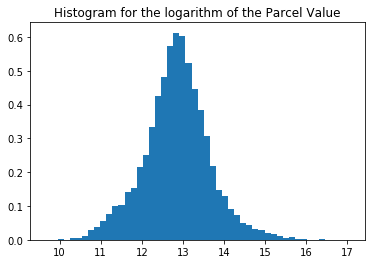

In [6]:
plt.hist(np.log(data.parcelvalue), density = True, bins = 50)
plt.title('Histogram for the logarithm of the Parcel Value')
plt.show()

With this simple transformation we now have a distribution of the parcel value that is not skewed and appears to be gaussian.

### 1.2. Exploration of missing data

In [7]:
#Exploring the pressence of missing values (as a percentage of all the observartions)
missing = data.isna().sum()/data.shape[0]

In [8]:
missing

lotid                 0.000000
logerror              0.928782
transactiondate       0.928782
aircond               0.415714
style                 0.990588
basement              0.997738
numbath               0.000000
numbedroom            0.000000
classbuild            0.999273
qualitybuild          0.408039
decktype              0.971238
finishedarea1st       0.751848
finishedarea          0.002545
perimeterarea         1.000000
totalarea             0.997495
finishedareaEntry     0.751848
countycode            0.000000
numfireplace          0.000000
numfullbath           0.001454
garagenum             0.596284
garagearea            0.596284
tubflag               0.949707
heatingtype           0.362189
latitude              0.000000
longitude             0.000000
lotarea               0.028641
poolnum               0.486124
poolarea              0.951283
citycode              0.001252
countycode2           0.000000
neighborhoodcode      0.392971
regioncode            0.000081
roomnum 

Lets build a function to make this output more understandable.

In [9]:
def missing_report(df, low=0.15, medium=0.35):
    """Function for creating a simple report on the presence of missing values 
    of a data set ussing the thresholds provided as parameters
    """
    
    #create series with percentage of missing values per column
    missing = df.isna().sum()/df.shape[0]
    
    #1. features with no missing values
    no_nas = missing[missing == 0]
    
    print('\n **************************************************************************************** \n', 
          '                 ', 'Features with no missing values: ', len(no_nas), '                  ',
          '\n ****************************************************************************************')
    
    #2. features with 'low' number of missing values
    low_nas = missing[(missing <= low) & (missing > 0)]
    
    print('\n **************************************************************************************** \n', 
          '      ', 'Features with ', low*100, '% or less missing values: ', len(low_nas), '        ',
          '\n ****************************************************************************************')
    
    #3. features with 'medium' number of missing values
    medium_nas = missing[(missing <= medium) & (missing > low)]
    
    print('\n **************************************************************************************** \n', 
          ' ', 'Features with missing values between', low*100, '% and ', medium*100, '% : ', len(medium_nas),' ',
          '\n ****************************************************************************************')
    
    if len(medium_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(medium_nas.index, medium_nas)
        plt.title('Features with medium number of missing values')
        plt.show()
    
    #4. features with 'large' number of missing values
    large_nas = missing[(missing >= medium)]
    
    print('\n **************************************************************************************** \n', 
          'WARNING: ', 'Features with ', medium*100, '% or more missing values: ', len(large_nas), '        ',
          '\n ****************************************************************************************')
    
    if len(large_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(large_nas.index, large_nas)
        plt.title('Features with large number of missing values')
        plt.show()
    


 **************************************************************************************** 
                   Features with no missing values:  13                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  8          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


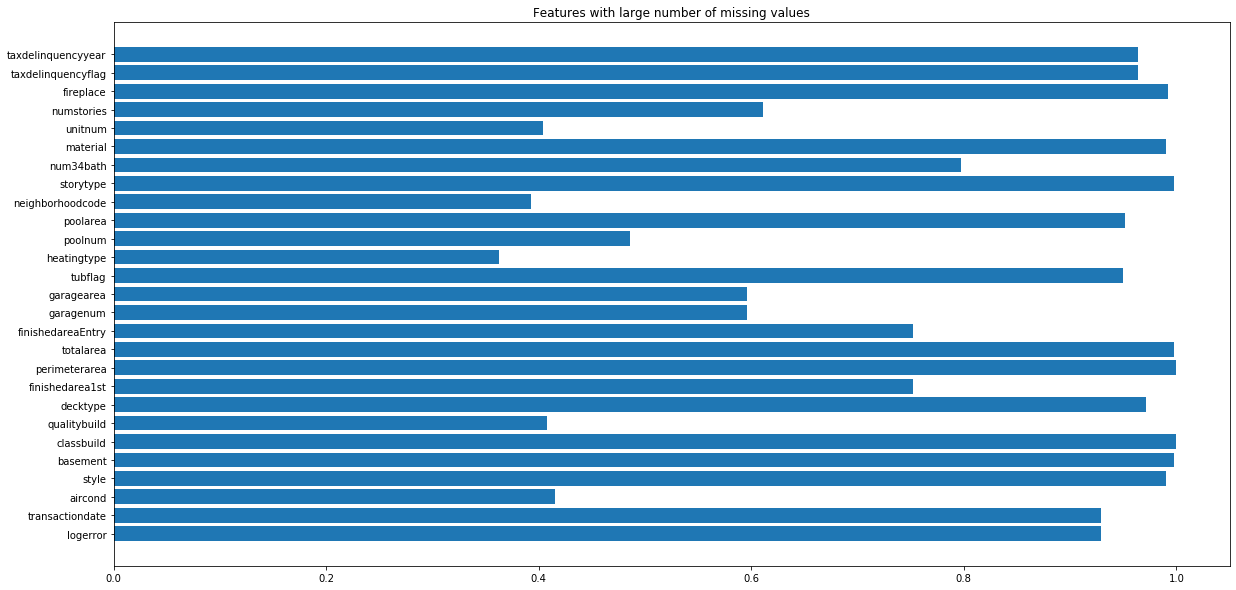

In [10]:
missing_report(data)

Missing values are clearly an important issue that deserves consideration for this dataset. We will do this in the following step.

## Step 2: Remove features with missing data, and then observations with missing data

Dealing with missing data is difficult. It is not always clear when a feature has such a low amount of available data that maybe it is not worth considering. We will try an approach that uses different tools to deal with missing data hoping that it does a sensible job. The steps to clean the data will be the following:

1. Remove the features with more than 80% of missing data. It seems that whatever we do with these features we would be introducing very noisy measures.
2. Use sklearn IterativeImputer to impute the rest of the missing data.
3. Test how results change if we use a different threshold for removing features.

### Step 2.1. : Handling features with a really high percentage of missing values (> 80%)

In [11]:
#lets start by making a copy of the data
df = data.copy()

In [12]:
# Lets try with 80%
high_missing = df.columns[missing > 0.8]

In [13]:
len(high_missing)

15

In [14]:
df2 = df.drop(axis=1,labels = high_missing)

In [15]:
df2.shape

(24755, 33)

By dropping these features we have now reduce our dataset to 33 features. This is potentially good because we will be shortly introducing new varibles when creating dummies and categorical features.

### Step 2.2. Imputing missing data

I tried to imputting missing data using the IterativeImputer from sklearn. However, I found that it could to interpret the results of the imputation since most of the variables are categorical and the imputer is going to give values really different from the categories 'allowed'. For this reason, I will pursue a simpler apporach using SimpleImputer.

In [16]:
# explicitly require this experimental feature
#from sklearn.experimental import enable_iterative_imputer
# now we can import normally from sklearn.impute
#from sklearn.impute import IterativeImputer
#imputer = IterativeImputer(initial_strategy = 'median', random_state = 92)
#imputer
#df_imp = imputer.fit_transform(df2)

In [17]:
from sklearn.impute import SimpleImputer
simp_imputer = SimpleImputer(strategy = 'median')
simp_imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [18]:
df_imp = simp_imputer.fit_transform(df2)

In [19]:
df_imp.shape

(24755, 33)

In [20]:
#reconvert the imputed data into a pandas DataFrame
df_imp = pd.DataFrame(df_imp, columns = df2.columns)

In [21]:
df_imp

,lotid,aircond,numbath,numbedroom,qualitybuild,finishedarea1st,finishedarea,finishedareaEntry,countycode,numfireplace,...,num34bath,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,mypointer
0,17214744.0,1.0,2.0,3.0,6.0,1255.0,1255.0,1255.0,6111.0,1.0,...,1.0,1.0,1979.0,1.0,103993.0,142212.0,2015.0,38219.0,1715.08,25711.0
1,12018724.0,1.0,2.0,1.0,4.0,1300.0,1033.0,1301.0,6037.0,0.0,...,1.0,1.0,1973.0,2.0,129428.0,301141.0,2015.0,171713.0,3851.88,13268.0
2,11306699.0,1.0,3.0,4.0,4.0,1300.0,2982.0,1301.0,6037.0,0.0,...,1.0,1.0,2004.0,2.0,175069.0,235062.0,2015.0,59993.0,3818.24,5423.0
3,11047729.0,1.0,2.0,3.0,7.0,1300.0,1757.0,1301.0,6037.0,0.0,...,1.0,1.0,1952.0,2.0,162926.0,270543.0,2015.0,107617.0,3450.67,26198.0
4,17174848.0,1.0,3.0,2.0,6.0,1047.0,1951.0,1047.0,6111.0,0.0,...,1.0,1.0,1988.0,2.0,180532.0,300886.0,2015.0,120354.0,3394.26,25187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,11633053.0,1.0,3.0,2.0,7.0,1300.0,1382.0,1301.0,6037.0,0.0,...,1.0,1.0,1982.0,2.0,214623.0,786817.0,2016.0,572194.0,9550.24,8421.0
24751,10751511.0,1.0,2.0,2.0,7.0,1300.0,1127.0,1301.0,6037.0,0.0,...,1.0,1.0,1973.0,2.0,96981.0,282464.0,2015.0,185483.0,4086.50,29610.0
24752,10719915.0,1.0,2.0,4.0,6.0,1300.0,2179.0,1301.0,6037.0,0.0,...,1.0,1.0,1962.0,2.0,102310.0,419389.0,2016.0,317079.0,5259.98,17317.0
24753,11639212.0,1.0,5.0,5.0,10.0,1300.0,3807.0,1301.0,6037.0,0.0,...,1.0,1.0,1923.0,2.0,693832.0,3437492.0,2015.0,2743660.0,40656.13,6587.0


In [22]:
#verify that we no longer have missing data left
missing_report(df_imp)


 **************************************************************************************** 
                   Features with no missing values:  33                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  0          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


In [23]:
#copy of the final df after imputation
df_final = df_imp.copy()

## Step 3: Feature crafting

Our database has an important number of categorical values that we would like to use in our model. But, we need to carefully think how to do this. Creating dummy variables for each category is one option. However, this turns out to be problematic when we have a very large number of categories and few observations per category

In [24]:
#drop variables that we were told to drop
X = df_final.drop(['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer'], axis = 1)
#this is the classificatoin outcome
y = df_final["parcelvalue"]  
#as said before we would like to work with the logarithm of the parcel value
y_log = np.log(y)

### Step 3.1. : Exploration of variables and creation of dummies

In [25]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install category_encoders

In [26]:
import category_encoders as ce

In [27]:
#lets create a dataframe for the transformed data
X_trans = X.copy()

In [28]:
X_trans.describe()

,aircond,numbath,numbedroom,qualitybuild,finishedarea1st,finishedarea,finishedareaEntry,countycode,numfireplace,numfullbath,...,citycode,countycode2,neighborhoodcode,regioncode,roomnum,num34bath,unitnum,year,numstories,taxyear
count,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,...,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000
mean,1.646940,2.603514,3.297637,5.787033,1332.349586,2094.479539,1335.745304,6058.793981,0.320743,2.503777,...,28734.358271,2560.090487,122252.239144,96636.356413,2.705554,1.002545,1.003757,1972.887013,1.821127,2015.281761
std,2.643752,1.045068,1.072567,1.741370,352.762842,1171.576602,370.699480,30.976970,0.619474,1.044157,...,32240.606572,699.388621,154260.350379,4734.032473,3.533887,0.060578,0.095265,18.740491,0.400268,0.449867
min,1.000000,0.000000,0.000000,1.000000,47.000000,188.000000,47.000000,6037.000000,0.000000,1.000000,...,4406.000000,1286.000000,6952.000000,95982.000000,0.000000,1.000000,1.000000,1880.000000,1.000000,2015.000000
25%,1.000000,2.000000,3.000000,4.000000,1300.000000,1347.000000,1301.000000,6037.000000,0.000000,2.000000,...,12447.000000,2061.000000,48200.000000,96336.000000,0.000000,1.000000,1.000000,1961.000000,2.000000,2015.000000
50%,1.000000,2.500000,3.000000,6.000000,1300.000000,1821.000000,1301.000000,6037.000000,0.000000,2.000000,...,21412.000000,3101.000000,51906.000000,96385.000000,0.000000,1.000000,1.000000,1974.000000,2.000000,2015.000000
75%,1.000000,3.000000,4.000000,7.000000,1300.000000,2512.000000,1301.000000,6059.000000,1.000000,3.000000,...,40227.000000,3101.000000,117954.000000,97021.000000,6.000000,1.000000,1.000000,1985.500000,2.000000,2016.000000
max,13.000000,19.000000,11.000000,12.000000,10110.000000,31415.000000,13370.000000,6111.000000,9.000000,19.000000,...,396556.000000,3101.000000,764166.000000,399675.000000,18.000000,5.000000,9.000000,2016.000000,3.000000,2016.000000


From the list of features we can see that there are a few clear candidates for using a dummies (one-hot encoding) approach:

1. Heating type
2. Air conditioning type
3. Tax year
4. County

Some other features could be candidates for one-hot encoding but due to the very large number of categories they could introduce we are pursuing a different approach. We would use tools from the *category_encoders* library to deal with these cases.

1. City
2. Year of construction

Lets explore these features and create the new features.

### 3.1.1 One-Hot encoding

In [29]:
one_hot = ce.one_hot.OneHotEncoder(cols = ['aircond', 'heatingtype', 'taxyear', 'countycode'], 
                                   verbose = 1, use_cat_names = True )
one_hot

OneHotEncoder(cols=['aircond', 'heatingtype', 'taxyear', 'countycode'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=1)

In [30]:
X_trans = one_hot.fit_transform(X_trans)

In [31]:
X_trans.columns

Index(['aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'citycode', 'countycode2', 'neighborhoodcode',
       'regioncode', 'roomnum', 'num34bath', 'unitnum', 'year', 'numstories',
       'taxyear_2015.0', 'taxyear_2016.0'],
      dtype='object')

In [32]:
#there are two different county codes, lets drop one
X_trans = X_trans.drop(columns = 'countycode2')

### 3.1.2 Categorical encoding

Some of our categorical variables have a very large number of categories and, thus, transforming them into dummy variables could potentially be harmful. We will use some strategies from categorical encoding to solve this problem.

In [33]:
#Year of construction
print(len(X_trans.year.value_counts()))
#City
print(len(X_trans.citycode.value_counts()))

123
154


In [34]:
ce_hash_city = ce.HashingEncoder(cols = ['citycode'])
ce_hash_city
X_trans = ce_hash_city.fit_transform(X_trans)

In [35]:
X_trans.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'year', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype='object')

In [36]:
features_added = ce_hash_city.get_feature_names()[0:8]

In [37]:
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'cities_{}'.format(f) for f in features_added})

In [38]:
ce_hash_year = ce.HashingEncoder(cols = ['year'])
ce_hash_year
X_trans = ce_hash_year.fit_transform(X_trans)

In [39]:
features_added = ce_hash_year.get_feature_names()[0:8]
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'years_{}'.format(f) for f in features_added})

In [40]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'num

### 3.1.3. Ordinal features

A number of features represent characteristics of a house that have meaning and increasing importance (two bathrooms are better than one).

### 3.1.4 Other features

In [41]:
# Latitude
print(len(X.latitude.value_counts()))
# Longitude
print(len(X.longitude.value_counts()))

21154
20549


These two features have such a large number of different categories that they might not be adding a lot of value to the model

In [42]:
X_trans = X_trans.drop(['latitude', 'longitude'], axis = 1)

In [43]:
#Neighborhoods
print(len(X.neighborhoodcode.value_counts()))
#Region
print(len(X.regioncode.value_counts()))

453
371


At this stage, it seems that with the **city** and the **county** we might be getting enough geographical information and, thus, there might not be a need to increase dramatically the features by adding the dummies for neighborhood or region

In [44]:
X_trans = X_trans.drop(['neighborhoodcode', 'regioncode'],axis = 1)

In [45]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'lotarea', 'poolnum', 'roomnum',
       'num34bath', 'unitnum', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype=

### Step 3.5 : Consolidating the data

At this stage we have decided to create dummy variables (one-hot encoding) for:
1. heating
2. aircond
3. tax_year
4. county

We took a different approach using the Hash Enconding for:
1. city
2. year

We have decided to exclude from the dataset:
1. countycode2
2. latitude
3. longitude
4. neighborhoodcode
5. regioncode

In [46]:
X_trans.shape

(24755, 54)

We have managed to create a reasonable amount of features!

## Step 4: Build your model and get predictions from train data

In [47]:
# Perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state = 92)

In [48]:
#lets create a variable with the log of our target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Step 4.1: Random forest model

In [50]:
#Relevant modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [51]:
#Initialize the model for Regression with 20 trees in the forest
forest = RandomForestRegressor(n_estimators=20, criterion = 'mse')
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 4.1.1 Random Grid Search CV to get parameters

In [57]:
parameters = dict(max_depth = np.random.randint(low = 1, high = 80, size = 15),
                 min_samples_leaf = np.random.randint(low = 1, high = 30, size = 10),
                 max_features = ['auto'],
                 max_leaf_nodes = np.random.randint(low = 10, high = 200, size = 15) )

In [58]:
from sklearn.model_selection import RandomizedSearchCV
rand_gridcv = RandomizedSearchCV(forest, parameters, random_state=92, scoring='r2', cv=5) 

In [59]:
forest_opt = rand_gridcv.fit(X_trans, y_log)

In [60]:
#CAUTION: this accuracy is predicting on the log of the parcel value
forest_opt.best_score_

0.4904748173782909

In [61]:
forest_opt.best_params_

{'min_samples_leaf': 11,
 'max_leaf_nodes': 155,
 'max_features': 'auto',
 'max_depth': 78}

### 4.2. XGBoost model

In [62]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

In [63]:
import xgboost as xgb

In [66]:
xgb_model = xgb.XGBRegressor(seed=92)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=92,
             silent=None, subsample=1, verbosity=1)

In [67]:
parameters = {'max_depth': [4,6,8], #max tree depth for base learners
              'learning_rate': [0.075, 0.1, 0.125], #so called `eta` value
              'n_estimators': [50, 100], #number of trees 
              'objective':['reg:squarederror'], 
              'gamma': [0.075,0.1,0.125],
              'tree_method':['auto'], #see documentation
              'min_child_weight': [7,10,12],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'reg_alpha': [0], #L1 regularization (Lasso)
              'reg_lambda':[0.5, 1, 1.5], #L2 regularization (Ridge)
              'random_state': [92]}


xgb_gridcv = GridSearchCV(xgb_model, parameters, cv=5, scoring= 'r2', verbose=1)

In [68]:
#fit the model
xgb_opt = xgb_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getat

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

In [69]:
#CAUTION: this accuracy is predicting on the log of the parcel value
xgb_opt.best_score_

0.5099566554996715

In [70]:
xgb_opt.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.075,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'random_state': 92,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8,
 'tree_method': 'auto'}

In [71]:
#Save the model
import pickle
filename = 'tuned_xgb.sav'
pickle.dump(xgb_opt, open(filename, 'wb'))

### 4.3. AdaBoost Model

In [72]:
from sklearn.ensemble import AdaBoostRegressor

In [73]:
#initialize the model
ada = AdaBoostRegressor(random_state=92)
ada

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=92)

In [74]:
parameters = {'learning_rate': [0.5, 1, 2, 3],
             'loss': ['linear', 'exponential'],
             'n_estimators': [50,75,100,125]}

ada_gridcv = GridSearchCV(ada, parameters, scoring = 'r2')

In [75]:
ada_opt = ada_gridcv.fit(X_trans, y_log)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [76]:
ada_opt.best_score_

0.4350426313981099

In [77]:
ada_opt.best_params_

{'learning_rate': 2, 'loss': 'linear', 'n_estimators': 100}

## Step 5: Assess expected accuracy

### 5.1. Random forest accuracy

In [78]:
#Predictions for the training data
y_pred_train_log = forest_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = forest_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [79]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.5565219658975618
Mean Squared Error for train data: 213624607058.36923
R2 for test data : 0.4698713809025292
Mean Squared Error for test data: 351485155970.5944


In [80]:
#lets create a dictionary to store this results
results = {'forest': {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}} 

In [81]:
results

{'forest': {'r2': 0.4698713809025292, 'mse': 351485155970.5944}}

### 5.2. XGBoost accuracy

In [82]:
#Predictions for the training data
y_pred_train_log = xgb_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = xgb_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [83]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.6806009214403136
Mean Squared Error for train data: 153855427789.59268
R2 for test data : 0.6120999551700375
Mean Squared Error for test data: 257184960114.35284


In [84]:
#add results to dictionary
results['xgb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.4698713809025292, 'mse': 351485155970.5944},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284}}

### 5.3. AdaBoost accuracy

In [85]:
#Predictions for the training data
y_pred_train_log = ada_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = ada_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [86]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.44019088669435935
Mean Squared Error for train data: 269661612665.09964
R2 for test data : 0.42010384467938444
Mean Squared Error for test data: 384481960145.1074


In [87]:
#add results to dictionary
results['ada'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.4698713809025292, 'mse': 351485155970.5944},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.42010384467938444, 'mse': 384481960145.1074}}

## Step 6: Feature importance

After getting a first evaluation of the performance of each model on the test dataset, now we would want to understand feature importance. This will help us in two ways. First, we could potentially discard some of the features that have very low importances and reduce the dimensionality of the problem. Second, we could use the most important features for propagation in an ensemble (we will do this in the next step).

In [88]:
feature_names = X_trans.columns
importances = forest_opt.best_estimator_.feature_importances_
important_features = pd.Series(data=importances/importances.max() ,index=feature_names)
important_features.sort_values(ascending=False)

finishedarea         1.000000
qualitybuild         0.058638
lotarea              0.022281
numbedroom           0.018936
numbath              0.014218
garagearea           0.008704
finishedarea1st      0.007432
finishedareaEntry    0.006304
years_col_7          0.002518
cities_col_6         0.002458
roomnum              0.002262
numfireplace         0.002173
cities_col_0         0.002166
years_col_0          0.002075
countycode_6059.0    0.001887
heatingtype_7.0      0.001870
numfullbath          0.001508
taxyear_2016.0       0.001316
cities_col_1         0.001142
taxyear_2015.0       0.001112
cities_col_3         0.001017
cities_col_5         0.001008
numstories           0.000935
years_col_6          0.000872
cities_col_7         0.000817
years_col_4          0.000804
years_col_2          0.000797
heatingtype_2.0      0.000785
countycode_6111.0    0.000659
years_col_3          0.000619
years_col_1          0.000617
years_col_5          0.000600
garagenum            0.000444
heatingtyp

In [89]:
importances2 = xgb_opt.best_estimator_.feature_importances_
important_features2 = pd.Series(data=importances2/importances2.max() ,index=feature_names)
important_features2.sort_values(ascending=False)

numfullbath          1.000000
numbath              0.510061
finishedarea         0.496430
qualitybuild         0.298949
numstories           0.089855
countycode_6111.0    0.089102
years_col_0          0.086056
numbedroom           0.085570
cities_col_0         0.084096
garagearea           0.079651
cities_col_6         0.076788
taxyear_2016.0       0.075524
countycode_6059.0    0.073932
heatingtype_6.0      0.073826
years_col_7          0.068045
cities_col_7         0.063442
heatingtype_7.0      0.061699
years_col_6          0.061408
finishedareaEntry    0.059457
heatingtype_2.0      0.056797
numfireplace         0.055303
aircond_5.0          0.053797
lotarea              0.053507
cities_col_3         0.053317
finishedarea1st      0.051637
countycode_6037.0    0.051139
garagenum            0.049512
cities_col_1         0.047973
aircond_13.0         0.047864
years_col_4          0.047790
cities_col_5         0.047314
roomnum              0.046857
years_col_2          0.046426
taxyear_20

In [90]:
#TODO: REDUCE THE NUMBER OF FEATURES ACCORDING TO THE ANALYSIS IN THIS SECTION

## Step 7: Building an ensemble

We would now build an ensemble that can combine the different Decision Trees models we have used (plus an SVM) in order to get a higher predictive power.

### 7.1. Complement the ensemble with additional models

In [ ]:
#creare a fit a simple Support Vector Regressor model
from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
parameters = {'C':[0.1, 1], 'epsilon': [0.1, 0.25, 0.5]}
#for computational reasons I will only use 3-fold CV and will only use the train data
svr_gridcv = GridSearchCV(svr_model, param_grid = parameters, scoring = 'r2', cv = 3, verbose = 10)
svr_opt = svr_gridcv.fit(X_train, y_train_log)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, epsilon=0.1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.1, epsilon=0.1, score=-21908.805, total=198.8min
[CV] C=0.1, epsilon=0.1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 198.8min remaining:    0.0s


[CV] ........... C=0.1, epsilon=0.1, score=-314453.125, total=107.7min
[CV] C=0.1, epsilon=0.1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 306.4min remaining:    0.0s


[CV] ............ C=0.1, epsilon=0.1, score=-59156.886, total=111.9min
[CV] C=0.1, epsilon=0.25 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 418.3min remaining:    0.0s


In [ ]:
#Predictions for the test data
y_pred_log = svr_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

#Reporting performance of this first model on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#add results to dictionary
results['svr'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

### 7.2. Building the ensemble

In [91]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mlens

     |████████████████████████████████| 235kB 2.6MB/s eta 0:00:01


In [147]:
#so lets start by creating a dictionary with our models!
models = {'forest': forest_opt.best_estimator_, 
          'xgb': xgb_opt.best_estimator_, 
          'ada': ada_opt.best_estimator_}
         #'svr': svr_opt.best_estimator_}

In [135]:
models.values()

dict_values([RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=78,
                      max_features='auto', max_leaf_nodes=155,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=11, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.075,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=92, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=92, silent=None, subsample=0.8, tree_method='auto',
             verbosity=

In [113]:
#now lets define the features we will propagate. We will use the top 3 features from XGBoost
to_propagate=['numfullbath', 'finishedarea', 'numbath']
pointer= [i for i,x in enumerate(X_trans.columns) if x in to_propagate]
X_trans.columns[pointer]

Index(['numbath', 'finishedarea', 'numfullbath'], dtype='object')

In [142]:
from sklearn.ensemble import ExtraTreesRegressor

meta_learner = ExtraTreesRegressor(n_estimators=50,bootstrap=True, max_leaf_nodes = 155, 
                                   max_features=0.7,random_state=92, min_samples_leaf = 11,
                                   max_depth = 78 , criterion = 'mse')

In [143]:
from mlens.ensemble import SuperLearner

# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4218, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...d9c378>)],
   n_jobs=-1, name='group-15', raise_on_exception=True, transformers=[])],
   verbose=9)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=92, sample_size=20,
       scorer=<function r2_score at 0x7f9709d9c378>, shuffle=False,
       verbose=10)

In [144]:
# Train the ensemble
ensemble = super_learner.fit(X_trans, y_log)


Fitting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'



Processing layer-1            
Learners ...                  


adaboostregressor.0.1          done | 00:00:09
adaboostregressor.0.2          done | 00:00:16
adaboostregressor.0.3          done | 00:00:16
adaboostregressor.0.0          done | 00:00:19
adaboostregressor.0.5          done | 00:00:06


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.9s


randomforestregressor.0.0      done | 00:00:07
adaboostregressor.0.4          done | 00:00:14
randomforestregressor.0.1      done | 00:00:05
randomforestregressor.0.2      done | 00:00:05
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
randomforestregressor.0.3      done | 00:00:04
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
randomforestregressor.0.4      done | 00:00:04
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future v

[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   42.1s remaining:    8.4s


xgbregressor.0.0               done | 00:00:14
xgbregressor.0.4               done | 00:00:07
xgbregressor.0.5               done | 00:00:07


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   48.4s finished
done | 00:00:48
layer-1                        done | 00:00:48
Processing layer-2            
Learners ...                  


extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
done | 00:00:00
layer-2                        done | 00:00:00


Fit complete                        | 00:00:49


In [145]:
#Predictions for the test data
y_pred_log = ensemble.predict(X_test)
y_pred = np.exp(y_pred_log)


Predicting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'

randomforestregressor.0.0      done | 00:00:00
xgbregressor.0.0               done | 00:00:00


Processing layer-1            
Learners ...                  


adaboostregressor.0.0          done | 00:00:00
extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
done | 00:00:00
layer-1                        done | 00:00:00
Processing layer-2            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
done | 00:00:00
layer-2                        done | 00:00:00


Predict complete                    | 00:00:00


In [146]:
#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for test data : 0.4763722395791091
Mean Squared Error for test data: 347174965493.1013


In [126]:
#add results to dictionary
results['ensemble'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.4698713809025292, 'mse': 351485155970.5944},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.42010384467938444, 'mse': 384481960145.1074},
 'ensemble': {'r2': 0.5400476893877691, 'mse': 304956955370.204}}

In [ ]:
#TO DO: tune the ensemble

## Feedback
Good job, you tried a couple of methods and reported correctly.

Some comments
+ Better if you do GridSearchCV to tune a bit more
+ Maybe worth to check if it'f better to predict log(y), and then report accuracy on y.
+ If you observe overfitting, you can use regularization parameters in xgboost.
+ For the final version, use different models and build ensemble, also play with propagating some of the input features. Also rethink the categorical variables and try other things than dummify if number of unique values is high.
+ To fill NA, don't use dropna as you do, better use SingleImputer to most of the columns, or even better use IterativeImputer